# 线性回归
1. 给定数据集 $D=\{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)\}$，其中 $x_i=(x_{i1};x_{i2};...;x_{id})$ ，线性回归模型试图预测：
$$\hat{y}=\theta_0+\theta_1x_1+\theta_2x_2+\cdots+\theta_nx_n$$
其中 $\theta_0$:偏差;$\theta_1,\theta_2,\cdots,\theta_n$:特征权重;使得预测值 $\hat{y}$ 与真实值 $y$ 尽可能的相近

    - 其向量化形式：$$\hat{y}=\theta^T\cdot{X}$$

2. 线性回归模型的 MSE 损失函数:
$$MSE(X,h_{\theta})=\frac{1}{m}\sum_{i=1}^{m}(\theta^T\cdot{X^{(i)}}-y^{(i)})^2$$
3. 最小化损失函数，其完全解如下，求解时间复杂度 $O(n^{2.4})-O(n^3)$：
$$\hat{\theta}=(X^{T}\cdot{X})^{-1}\cdot{X}^{T}\cdot{y}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.figure()
plt.scatter(X, y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
# 完全解
x_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

theta_best

array([[3.99641371],
       [3.04206717]])

In [3]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 3.99641371],
       [10.08054806]])

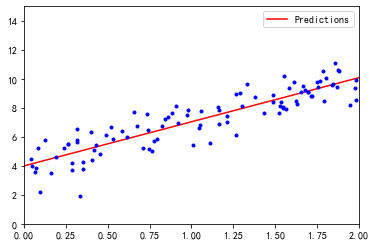

In [4]:
plt.plot(x_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [5]:
# 与完全解等价的 sklearn 的线性回归模型
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.99641371]), array([[3.04206717]]))

```
class sklearn.linear_model.LinearRegression(fit_intercept=True, 
                                            normalize=False, 
                                            copy_X=True, 
                                            n_jobs=None)
```
- 原理：最小二乘法
- 模型初始化的参数
    - `fit_intercept=True`：将数据中心化，每个属性的平均值都被设置为0；控制算法来包含一个回归常数，以适应反应变量的任何常数偏移。
    - `normalize=False`：把数据的每个属性用其标准差进行标准化
    - `copy_X=True`：设置为 False 时，X 变量会被覆盖
    - `n_jobs=None`：使用的处理器的数量，None 表示 1，-1 表示使用所有处理器
- 模型方法：
    - `fit(self, X, y, sample_weight=None)`
        - X,y 为训练样本及对应的目标值
        - `sample_weight` 为每个样本的权重值
    - `predict(self, X)` 进行预测
    - `score(self, X, y, sample_weight=None)`
        - 返回预测值的 R^2 系数
        - R^2系数定义为$(1-u/v)$，其中 $u$ 是残差的平方和（$\sum(y_{true}-y_{pred})^2$），$v$ 为 $\sum(y_{true}-y_{true}.mean()))^2$
        - 最佳的系数为 1.0， 此时 $y_{true}=y_{pred}$；系数也可能为负

- 模型属性：
    - `coef_`：系数矩阵
    - `intercept_`：回归常数

# 梯度下降
- 最小化损失函数，而不是准确度等指标，是因为损失函数是关于权重的平滑函数，而后者不是
- 梯度下降计算损失函数对参数向量的梯度，并向梯度下降的方向改变；当梯度为 0 时，到达最小值

![](images/Gradient-Descent.png)
- 梯度下降的步长是一个重要的参数，由超参数学习率(`learning_rate`)决定
- `Batch Gradient Descent`，迭代训练时每一步使用所有训练数据
    - 对单个参数的梯度：$$\frac{\partial}{\partial \theta_j} MSE(\theta)=\frac{2}{m}\sum_{i=1}^{m}(\theta^T\cdot X^{(i)}-y^{(i)})x_{j}^{(i)}$$
    - 损失函数对参数向量的梯度：$$\bigtriangledown_{\theta} MSE(\theta)=
\begin{cases}
\frac{\partial}{\partial \theta_0} MSE(\theta)\\
\frac{\partial}{\partial \theta_1} MSE(\theta)\\
\ \ \ \ \vdots\\
\frac{\partial}{\partial \theta_n} MSE(\theta)\\
\end{cases} 
 =\frac{2}{m}X^T\cdot{(X\cdot{\theta}-y)}$$
 其中 $X_{m\times n}\qquad \theta_{n\times 1}\qquad y_{m\times 1}$
    - 每一步参数更新为：$$\theta^{i+1}=\theta^i-\eta \bigtriangledown_\theta MSE(\theta)$$
    - 将迭代次数设置非常大，但当梯度变得足够小时，终止训练


In [ ]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2 / m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

- `Stochastic Gradient Descent`
    - 随机梯度下降，每一步从训练数据中随机选择一个样本，用来计算梯度；
    - 随机梯度下降算法，损失函数值上下波动，而不是稳定逐步减小到最小值；
    - 当损失函数非常不平整，即有多个局部最小值时，随机梯度会跳出局部最小，更可能求得全局最小
    - `Simulated annealing` 技巧，训练时逐渐减小学习率；开始时步长比较大，可以快速训练，跳出局部最小，然后逐渐变小
    - `Early Stopping`技巧，当模型在验证集上的误差不再变小时，停止训练

In [ ]:
n_epoches = 50
t0, t1 = 5, 50


def learning_schedule(t):
    return (t0 / (t + t1))


theta = np.random.randn(2, 1)

for epoch in range(n_epoches):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients

theta

In [8]:
# 随机梯度回归模型
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.coef_, sgd_reg.intercept_

(array([3.11578522]), array([4.00746624]))

In [ ]:
# Early stopping 技巧

from sklearn.base import clone
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=1,
                       warm_start=True,
                       penalty=None,
                       learning_rate='constant',
                       eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

- `Mini-batch Gradient Descent`
    - 每次在随机选择的小批量数据上计算梯度，并更新参数
    
几种线性回归算法的比较如下图所示：
![](images/ComparisonLinearRegression.JPG)

# 模型性能评估
- 通过交叉验证(`cross-validation`)来评估模型的泛化性能
- 学习曲线(`learning curves`)描绘模型在训练和测试集上的性能，与训练数据量的关系

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_test))

    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

# `The Bias-Variance Tradeoff`
一个模型预测结果和真实值之间的偏差可以表述为三种不同的错误(`error`):
- `Bias`：由于错误的假设，如将实际上二项式模型假设成线性模型；高`bias`模型，导致**欠拟合**问题
- `Variance`：由于模型对训练数据中微小变化过度敏感；高阶的模型，如高自由度多项式模型，更有可能有高`variance`，导致**过拟合**训练数据
- `Irreducible error`：由数据噪声导致，清洗数据来改善，如异常点检测、检查数据源等

增加模型的复杂度，将增加`variance`减小`bias`；降低模型复杂，则会增加`bias`减小`variance`；这就是需要权衡的地方

# 欠拟合和过拟合
- 过拟和是指模型对于训练数据拟合呈现过当的情况，反映到评估指标上，就是模型在训练集上表现很好，但在测试集上表现较差。欠拟合指的是在训练和预测时，表现都不好的情况
- 过拟合主要由于模型学习能力过于强大，以至于把训练样本自身所包含的不太一般的特性都学习到了，即模型过于复杂、训练数据偏少。导致模型的泛化能力下降
       
         
- 降低过拟合风险的方法：
    - 获取更多训练数据。可以一定的规则来扩充训练数据，如对图像数据，旋转、平移、缩放等操作；进一步，也可以使用 `GAN` 合成大量的新数据
    - 降低模型复杂度，如神经网络减少网络层数、神经元个数；决策树中，降低树的深度、进行剪枝等
    - 正则化方法
    - 集成学习方法，多模型集成，降低单一模型的过拟合风险
- 降低欠拟合风险的方法：
    - 添加新特征。当特征不足或现有特征与样本标签的相关性不强时，容易出现欠拟合
    - 增加模型复杂度，简单模型的学习能力较差
    - 减小正则化系数

# 正则化
在训练线性回归模型时，有的系数取值很大，且包含大量相关联的特征时，数据微小的变化就会导致模型很不稳定；通过加入正则化，控制与变量关联的权重，从而将不必要的变量的系数大幅惩罚降低。
- 岭回归(`Ridge Regression`)，损失函数：
$$J(\theta)=MSE(\theta)+\alpha \frac{1}{2}\sum_{i=1}^m\theta_i^2$$
    - 其中偏差项 $\theta_0$ 不被正则化，参数 $\alpha$ 决定了系数缩减的幅度， $\alpha$ 值越大，缩减幅度越大，系数的值越趋近于 0
    - 岭回归的完全解，矩阵 $A$ 为单位矩阵，除了左上角值为 0:$$\hat{\theta}=(X^{T}\cdot{X}+\alpha A)^{-1}\cdot{X}^{T}\cdot{y}$$
    

------------------------------
```
class sklearn.linear_model.Ridge(alpha=1.0, 
                                 fit_intercept=True, 
                                 normalize=False, 
                                 copy_X=True, 
                                 max_iter=None, 
                                 tol=0.001, 
                                 solver=’auto’, 
                                 random_state=None)
```
- 原理：
  - 在训练线性回归模型时，有的系数取值很大，导致模型不稳定。
  - 如果数据集包含大量关联的预测器，仅仅微小的改变都可能导致模型不稳定；此外，假定两个负相关的变量，对反应变量的影响是相反的
  - 可以将系数矩阵引入代价函数，对权重太高的系数进行惩罚，以减小系数的值，即缩减方法。
  - 岭回归：求得系数矩阵 $W​$，最小化目标函数 $||(y-X*W)||^2+\alpha*||W||^2​$
  
- 参数：
  - `alpha`：决定了缩减的幅度，$\alpha$ 越大，缩减幅度越大，系数的值越接近 0 
  - `tol`：代价函数的解的精度
  - `max_iter,solver`：求解代价函数的求解器

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

In [ ]:
# l2 惩罚，即岭回归
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())

sgd_reg.predict([[1.5]])

In [ ]:
%matplotlib inline
# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD 3 clause

import time

import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

rng = np.random.RandomState(0)

# #############################################################################
# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

X_plot = np.linspace(0, 5, 100000)[:, None]

# #############################################################################
# Fit regression model
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                   cv=5,
                   param_grid={
                       "C": [1e0, 1e1, 1e2, 1e3],
                       "gamma": np.logspace(-2, 2, 5)
                   })

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
                  cv=5,
                  param_grid={
                      "alpha": [1e0, 0.1, 1e-2, 1e-3],
                      "gamma": np.logspace(-2, 2, 5)
                  })

t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s" %
      svr_fit)

t0 = time.time()
kr.fit(X[:train_size], y[:train_size])
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s" %
      kr_fit)

sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s" %
      (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s" % (X_plot.shape[0], kr_predict))

# #############################################################################
# Look at the results
sv_ind = svr.best_estimator_.support_
plt.scatter(X[sv_ind],
            y[sv_ind],
            c='r',
            s=50,
            label='SVR support vectors',
            zorder=2,
            edgecolors=(0, 0, 0))
plt.scatter(X[:100],
            y[:100],
            c='k',
            label='data',
            zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_plot,
         y_svr,
         c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(X_plot,
         y_kr,
         c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1, 4, 7).astype(np.int)
for name, estimator in {
        "KRR": KernelRidge(kernel='rbf', alpha=0.1, gamma=10),
        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)
}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size], y[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)

    plt.plot(sizes,
             train_time,
             'o-',
             color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes,
             test_time,
             'o--',
             color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

# Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r", label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g", label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()

- `Lasso Regression(Least Absolute Shrinkage and Selection Operator Regression)`，损失函数：
 $$J(\theta)=MSE(\theta)+\alpha\sum_{i=1}^m|\theta_i|$$ 
     - `LASSO`回归，倾向于将不重要特征系数变为 0，因此相当于自动进行特征选择，并输出一个稀疏模型
     - `LASSO`回归的损失函数在 $\theta_i=0$ 处不可微，使用 `subgradient vector` $g$ 替代
$$\boxed{g(\theta,J)=\bigtriangledown_{\theta} MSE(\theta)+\alpha
\begin{pmatrix} 
sign(\theta_1)\\sign(\theta_2)\\ \vdots \\sign(\theta_n)
\end{pmatrix}\quad 
sign(\theta_i)=
\begin{cases}
-1 \quad if \quad \theta_i<0\\ 0 \quad\ if\quad  \theta_i=0\\ +1 \quad if \quad \theta_i>0
\end{cases}}
$$

- 原理：
  - 与岭回归相比，结果更倾向稀疏，即大多数稀疏都为 0
  - 对于相关联的变量。只选择保留其中一个；岭回归会给这些变量的系数分配相同的权重
  - 求得系数矩阵 $W$，最小化目标函数 $||(y-X*W)||^2+\alpha*||W||$

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

- `Elastic Net`，介于岭回归和 `LASSO`回归之间，其损失函数：
$$J(\theta)=MSE(\theta)+r\alpha\sum_{i=1}^m|\theta_i|+\frac{1-r}{2}\alpha\sum_{i=1}^m\theta_i^2$$ 
    - `Elastic Net` 也倾向于将无用特征的权重变为 0 
    - 当特征数多于样本数时，或多个特征强相关时，优先使用 `Elastic Net`

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

# 多项式回归

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [2]:
# 多项式特征
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [ ]:
# 多项式回归
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(x, yfit)

In [ ]:
# 自定义多项式特征
from sklearn.base import BaseEstimator, TransformerMixin


class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return (np.exp(-0.5 * np.sum(arg**2, axis)))

    def fit(self, x, y=None):
        self.centers_ = np.linspace(x.min(), x.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return (self)

    def transform(self, x):
        return (self._gauss_basis(x[:, :, np.newaxis],
                                  self.centers_,
                                  self.width_,
                                  axis=1))


gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())

gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)

In [ ]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))

    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10))


model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

In [ ]:
# 正则化-岭回归
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))

basis_plot(model, title='Ridge Regression')

In [ ]:
# 正则化-Lasso回归
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')